In [1]:
import sys
sys.path.append('../')

In [2]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier, QFT, classical_swaps, MyMP

In [3]:
num_qubits = 7

(<Figure size 1100x800 with 1 Axes>, <Axes: >)

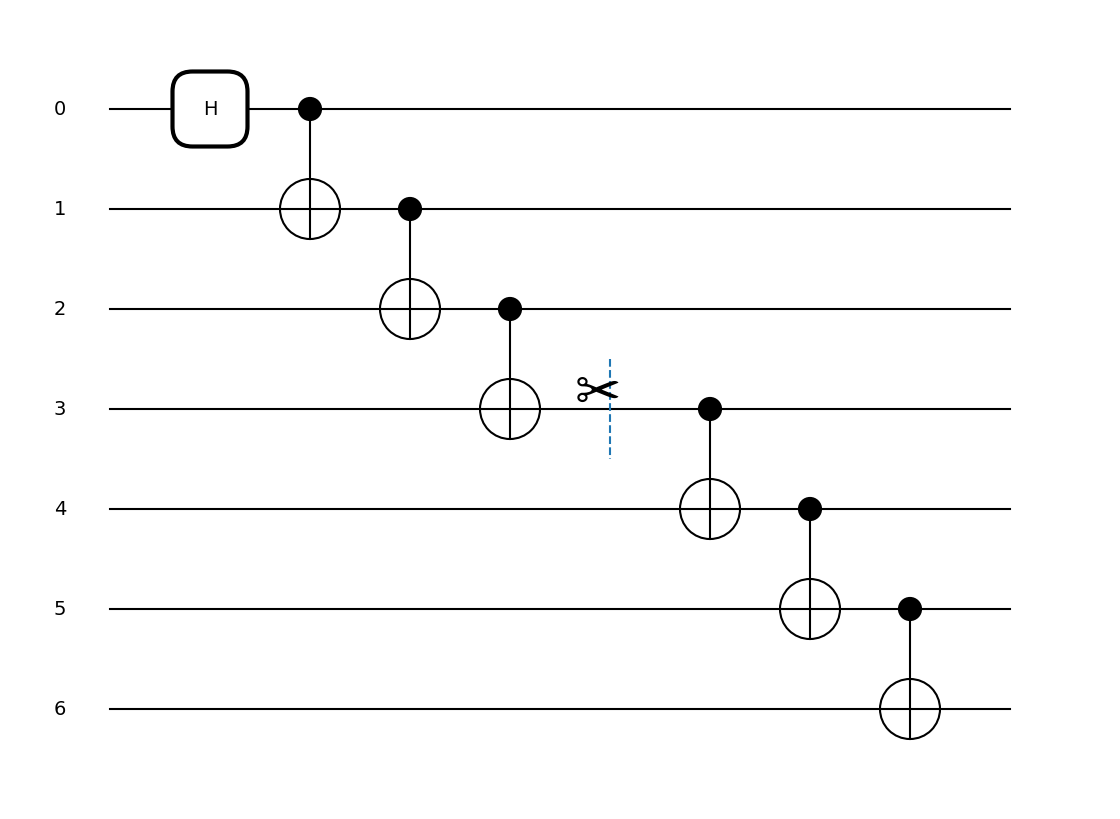

In [4]:
def var_state(params=None):
    qml.Hadamard(0)
    for j in range(num_qubits-1):
        qml.CNOT([j,j+1])
        if j==2:
            qml.WireCut(wires=j+1)

qml.draw_mpl( var_state )()   

In [5]:
dev = qml.device( "default.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : x**2/2,
                    lambda p : p**2/2,
                    dev,
                    semi_classical=True,
                    var_state= var_state
                    )

(<Figure size 1100x800 with 1 Axes>, <Axes: >)

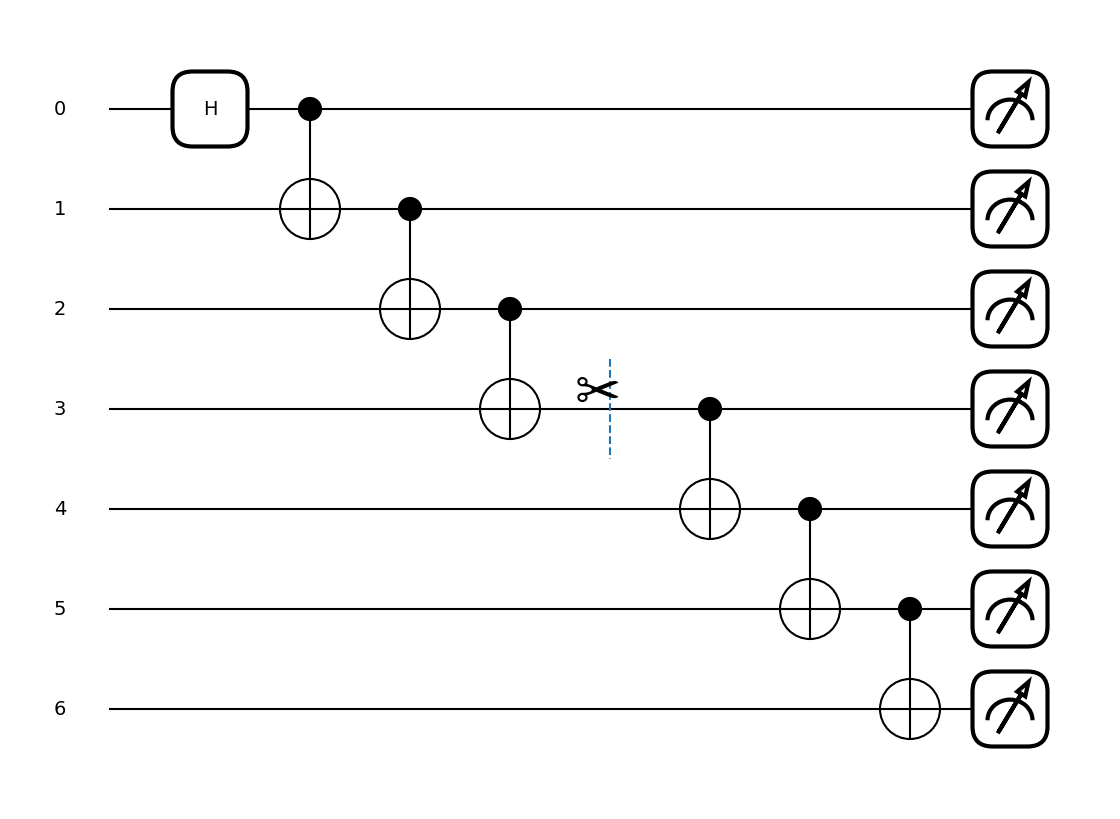

In [6]:
qml.draw_mpl( varqft.X_eval() )()

In [7]:
dev = qml.device( "default.qubit", wires=num_qubits)

qml.cut_circuit
@qml.qnode( dev )
def circuit_p(params=None):
    varqft.base_circuit(params)
    QFT( varqft.num_qubits, varqft.semi_classical )
    return MyMP( wires  = list(range(varqft.num_qubits)), 
                        eigvals = classical_swaps( varqft.fun_p_values, 
                                                    varqft.num_qubits) ) 

(<Figure size 3900x1000 with 1 Axes>, <Axes: >)

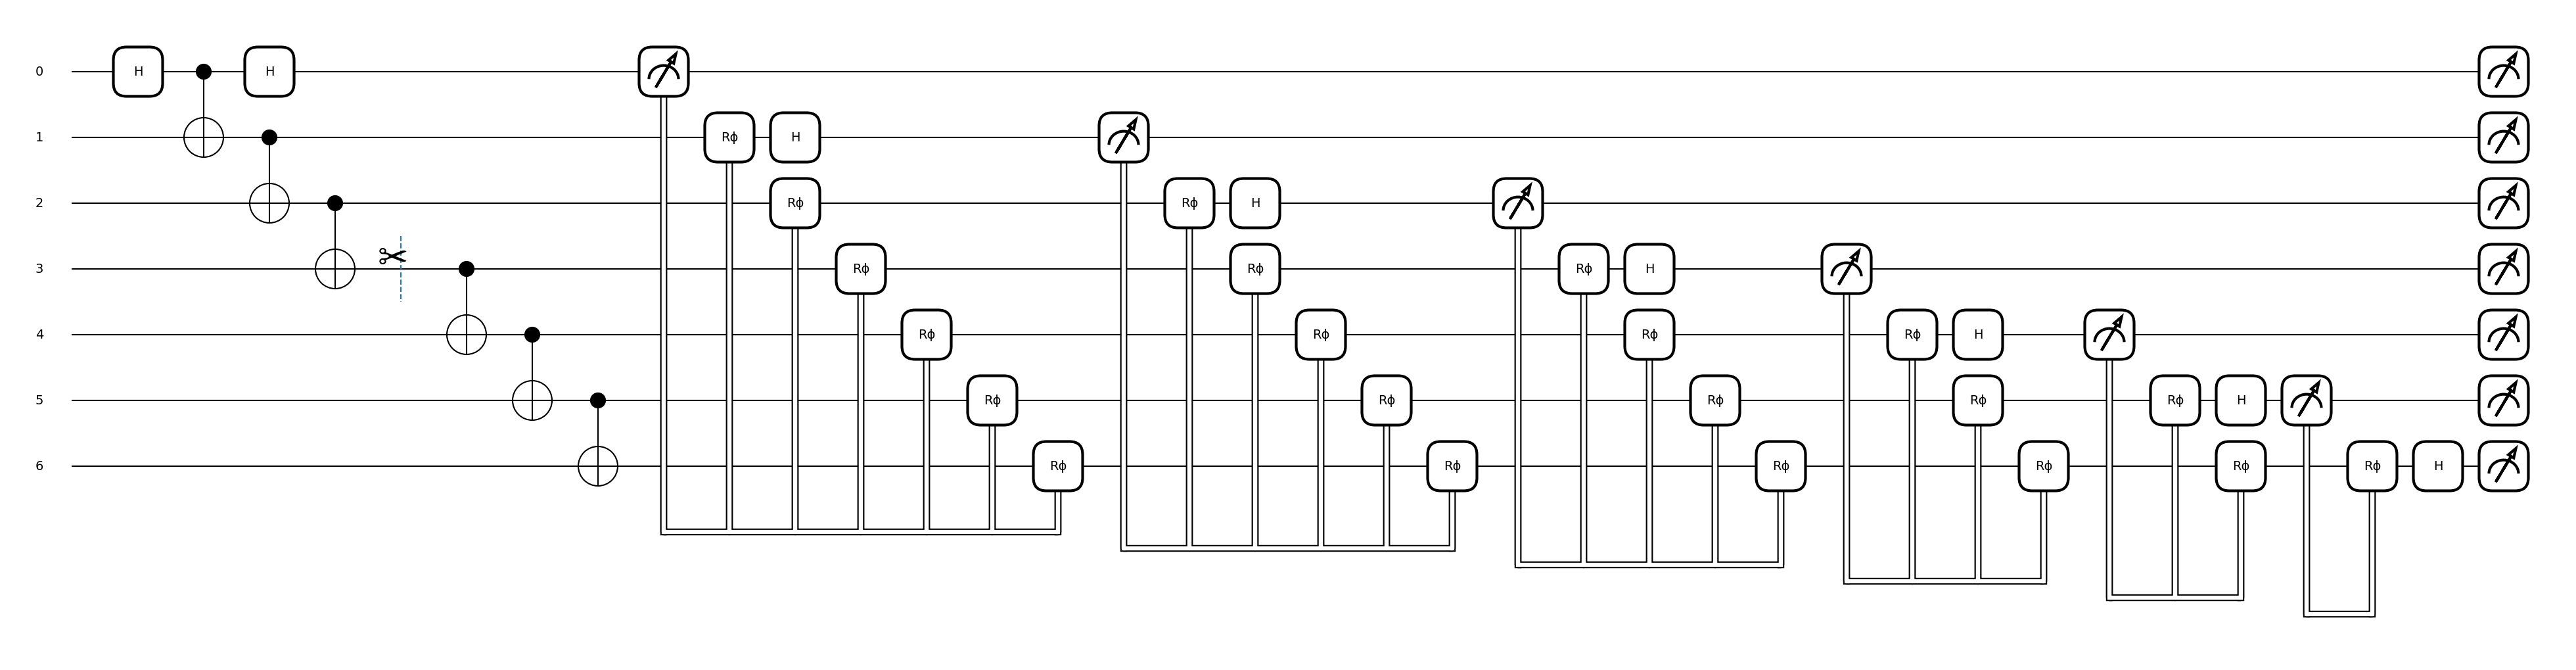

In [8]:
qml.draw_mpl(circuit_p)()

In [9]:
circuit_p()

tensor(104.02141174, requires_grad=True)

(<Figure size 3900x1000 with 1 Axes>, <Axes: >)

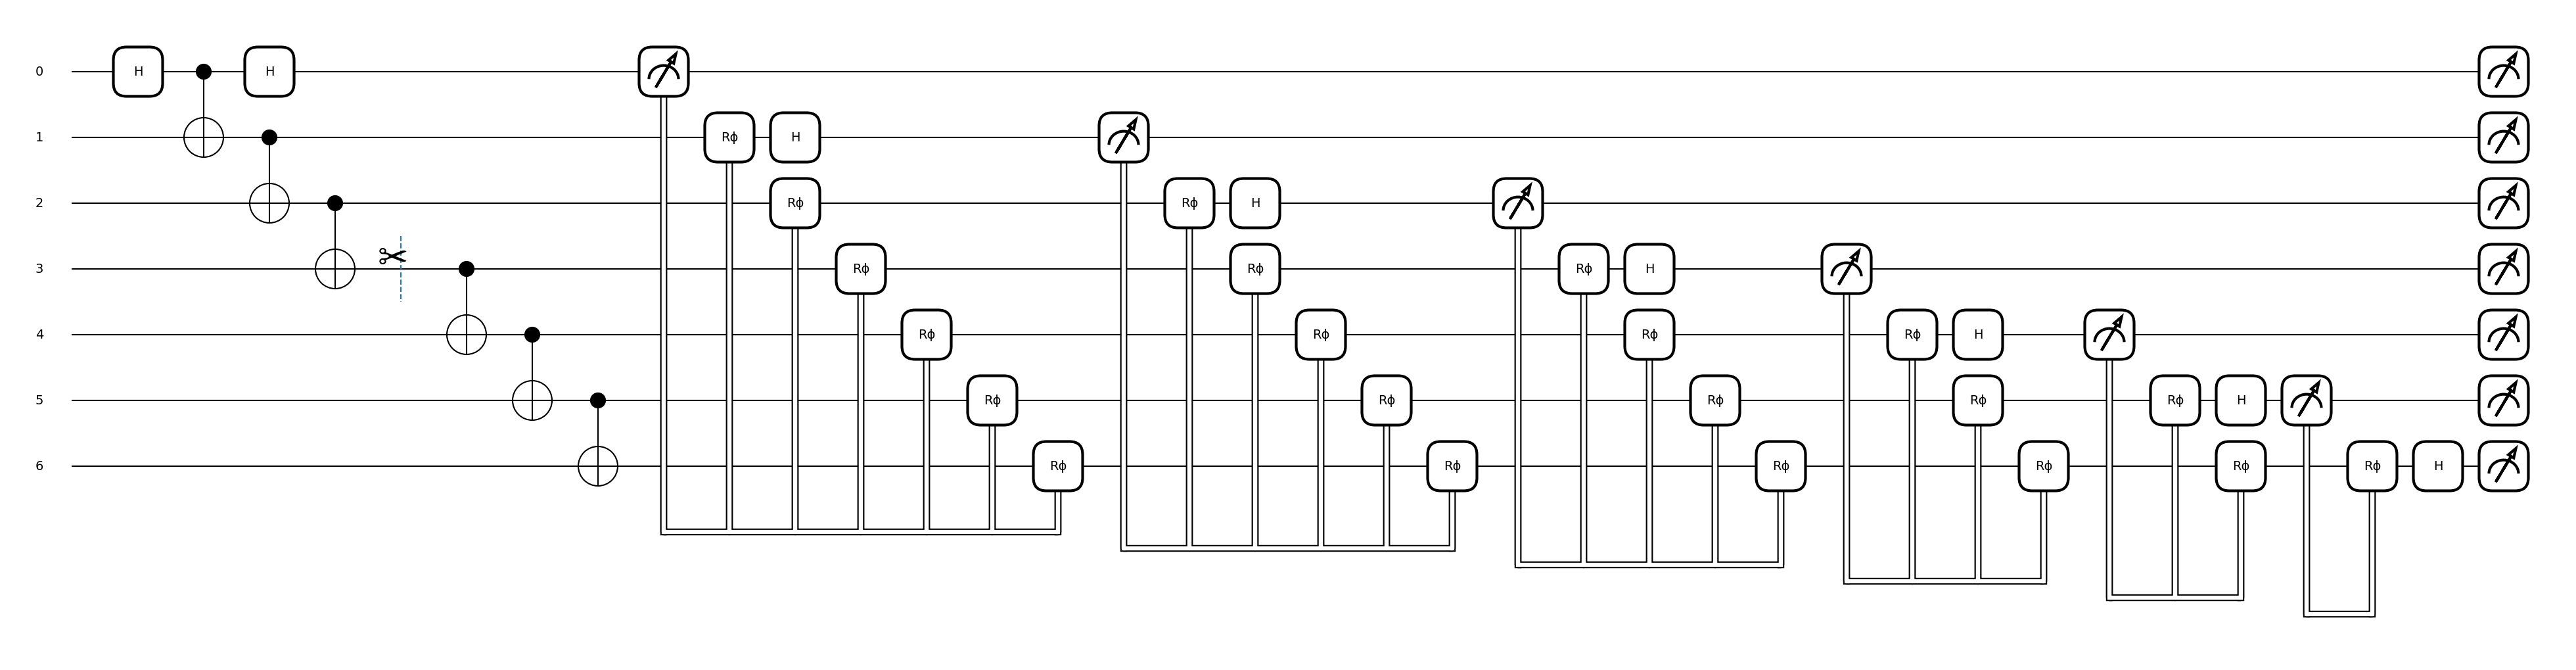

In [10]:
qml.draw_mpl(varqft.P_eval())()

In [11]:
varqft.energy_eval()

tensor(116.52141174, requires_grad=True)